In [45]:
import pandas as pd

# Loading cleaned World Bank data on forest area as percent of land area...
pct_forest_coverage = pd.read_csv('pct_forest_coverage.csv', index_col=0)

pct_forest_coverage

,Country,Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,AFG,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,...,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825,2.067825
1,Albania,ALB,28.788321,28.717152,28.645986,28.574818,28.503650,28.432481,28.361313,28.290147,...,28.465694,28.421168,28.376643,28.332116,28.297081,28.262044,28.227007,28.191972,28.156934,28.121897
2,Algeria,DZA,0.699908,0.696214,0.692519,0.688824,0.685129,0.681435,0.677740,0.674045,...,0.709061,0.741139,0.773216,0.805294,0.808485,0.811675,0.814866,0.818057,0.821248,0.824439
3,American Samoa,ASM,91.949997,91.750002,91.599998,91.450005,91.250000,91.099997,90.950003,90.749998,...,89.049997,88.900003,88.750000,88.549995,88.400002,88.199997,88.050003,87.900000,87.700005,87.500000
4,Andorra,AND,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,...,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553,34.042553
5,Angola,AGO,48.909922,48.809817,48.709712,48.609611,48.509506,48.409401,48.309296,48.209191,...,47.208148,47.108046,47.007942,46.907837,46.807732,46.707627,46.607525,46.507420,46.407315,46.307210
6,Antigua and Barbuda,ATG,23.409091,23.340910,23.272727,23.204546,23.136364,23.068181,23.000000,22.931819,...,22.272728,22.272728,22.272728,22.272728,22.272728,22.272728,22.272728,22.272728,22.272728,22.272728
7,Argentina,ARG,12.713534,12.606360,12.499186,12.392014,12.284841,12.177667,12.070494,11.963321,...,10.797715,10.681517,10.565318,10.449119,10.340667,10.232215,10.123763,10.015311,9.906858,9.798406
8,Armenia,ARM,11.766772,11.752722,11.752722,11.745697,11.738673,11.731647,11.724622,11.717598,...,11.647348,11.640323,11.633299,11.626273,11.633299,11.640323,11.647348,11.654373,11.661398,11.668423
9,Aruba,ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,...,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333


In [46]:
# Adding column with difference in forest coverage between 1990 and 2016...
pct_forest_coverage['Change'] = (pct_forest_coverage['2016'] - 
                                 pct_forest_coverage['1990'])

# Creating dataframe for ten countries with biggest forest losses...
top_10_losses = pct_forest_coverage.sort_values(by=['Change']).head(10)

# Dropping 'Change' column, since that was just used for sorting...
top_10_losses = top_10_losses.drop(columns='Change')

In [47]:
# Creating dataframe for ten countries with biggest forest gains...
top_10_gains = pct_forest_coverage.sort_values(by=['Change'],
                                               ascending=False).head(10)

# Dropping 'Change' column, since that was just used for sorting...
top_10_gains = top_10_gains.drop(columns='Change')

In [48]:
# Putting time series data for countries with biggest losses in tidy format...
top_10_losses = top_10_losses.melt(id_vars=['Country', 'Code'])

# Renaming columns...
top_10_losses = top_10_losses.rename(
    columns={'variable': 'Year', 'value': 'Coverage'})

In [49]:
# Putting time series data for countries with biggest gains in tidy format...
top_10_gains = top_10_gains.melt(id_vars=['Country', 'Code'])

# Renaming columns...
top_10_gains = top_10_gains.rename(
    columns={'variable': 'Year', 'value': 'Coverage'})

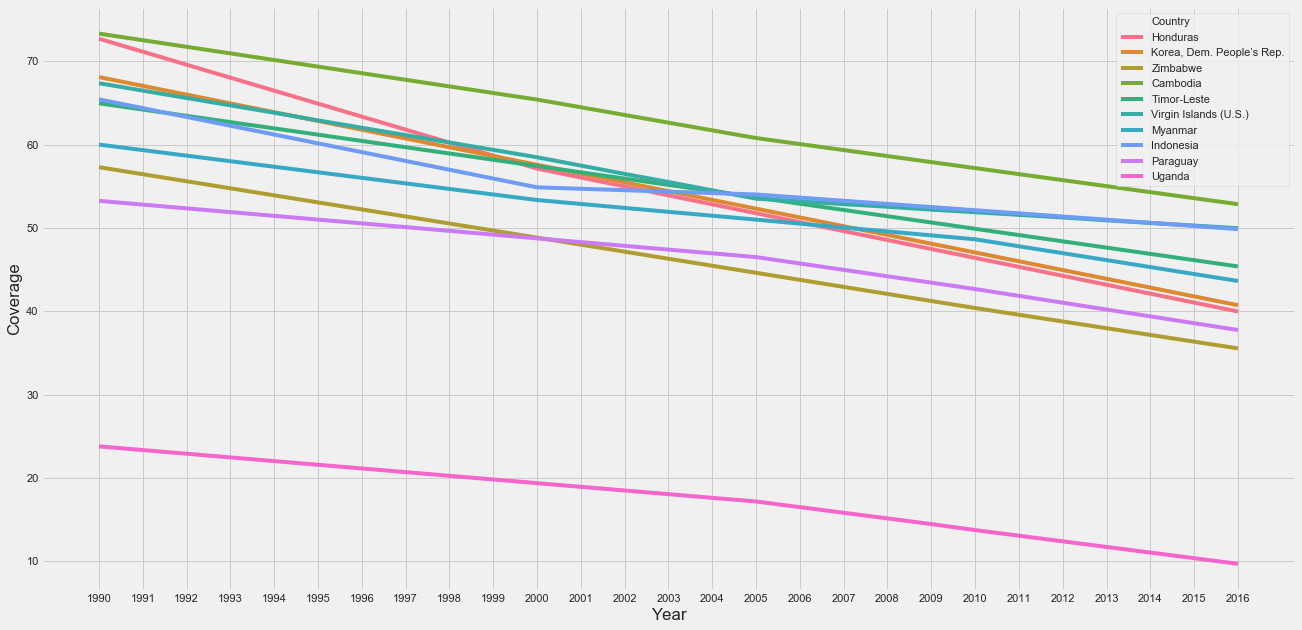

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=top_10_losses['Year'],
             y=top_10_losses['Coverage'],
             hue=top_10_losses['Country']);

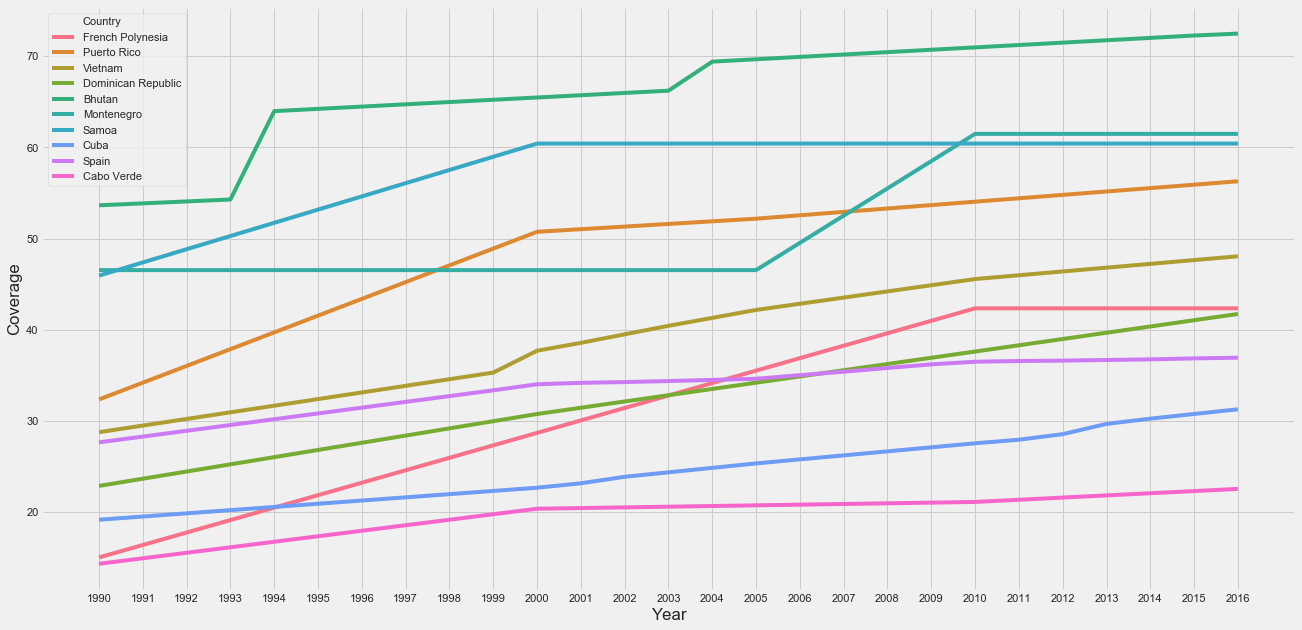

In [51]:
plt.style.use('fivethirtyeight')

f, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=top_10_gains['Year'],
             y=top_10_gains['Coverage'],
             hue=top_10_gains['Country']);